In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import causticTools.analytic as cAnalytic
import causticTools.io as cIo
%load_ext autoreload
%autoreload 2

In [4]:
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2.5

In [5]:
#unzoomed plot
M=1e9
m=0.9*M
t=1e7
nR=512
rMin=70
rMax=400
aR,aDens,aGrad=cAnalytic.densProfile(rMin,rMax,nR,M,m,t,returnGradient=1)
mu=(2-(M/m))**-1
eps=1-(mu**-1)
G=4.96e-15

/Users/Zephyr/Google Drive/astro/caustics/causticTools/analytic.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  return ((G*m*(t**2))*((1-eps*np.cos(eta))**3)/((eta-eps*np.sin(eta))**2))**(1/3)


In [25]:
#zoomed plots
nR=512
cMin=180
cMax=210
zMin=192.6
zMax=192.7
cR,cDens,cGrad=cAnalytic.densProfile(cMin,cMax,nR,M,m,t,returnGradient=1)
zR,zDens,zGrad=cAnalytic.densProfile(zMin,zMax,nR,M,m,t,returnGradient=1,evenSpaced=1)

/Users/Zephyr/Google Drive/astro/caustics/causticTools/analytic.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  return ((G*m*(t**2))*((1-eps*np.cos(eta))**3)/((eta-eps*np.sin(eta))**2))**(1/3)


In [6]:
turns=cAnalytic.findTurns(6)[1:] #first entry is zero for numerical ease elsewhere
etas=10**(np.linspace(1e-6,np.log10(100),num=1000))
turnRads=cAnalytic.findRad(turns)
print('eta of turns: ',turns)
print('radii of turns: ',turnRads)

eta of turns:  [  7.10116794   8.47851572  12.94964669  15.21080981  19.1027709
  21.64554136]
radii of turns:  [ 192.6199015   197.14825823  124.57621924  136.96773361   95.53763257
  108.81319518]


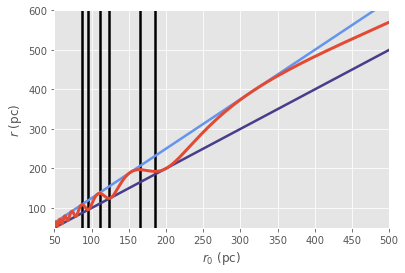

In [8]:
# r vs r0
r0s=cAnalytic.findR0(etas)
rs=cAnalytic.findRad(etas)
rR0=plt.gca()
rR0.plot(rs,rs,color='darkslateblue')
rR0.plot(rs,(M*mu/m)*rs,color='cornflowerblue')
rR0.vlines(cAnalytic.findR0(turns),0,600)
rR0.plot(r0s,rs,linewidth=3)
rR0.set_xlim([50,500])
rR0.set_ylim([50,600])
rR0.set_xlabel(r'$r_0$ (pc)')
rR0.set_ylabel(r'$r$ (pc)')
plt.savefig('plots/r_r0.pdf')

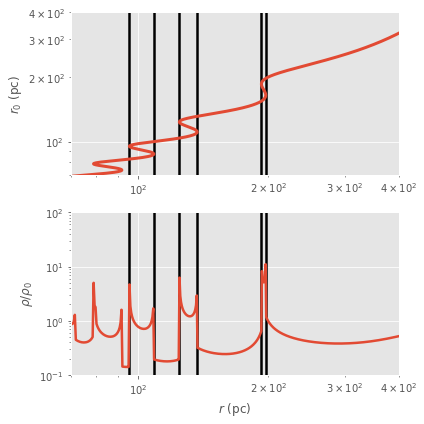

In [9]:
# r0 vs r & rho vs r
fig = plt.figure(figsize=(6,6))
noZoom=mpl.gridspec.GridSpec(2,1)

roR = plt.subplot(noZoom[0,0])  
#gradR.loglog(aR[aGrad>0],aGrad[aGrad>0],c='blue')
#gradR.loglog(aR[aGrad<0],-aGrad[aGrad<0],c='purple')
#roR.plot(rs,rs,color='darkslateblue')
#roR.plot((M*mu/m)*rs,rs,color='cornflowerblue')
roR.vlines(cAnalytic.findRad(turns),1,1000)
roR.loglog(rs,r0s,linewidth=3)
roR.set_xlim([rMin,rMax])
roR.set_ylim([rMin,rMax])
roR.set_ylabel(r'$r_0$ (pc)')

rhoR = plt.subplot(noZoom[1,0])
rhoR.vlines(turnRads,0.01,1000)
rhoR.loglog(aR,aDens)
rhoR.set_xlim([rMin,rMax])
rhoR.set_ylim([0.1,100])
rhoR.set_xlabel(r'$r$ (pc)') 
rhoR.set_ylabel(r'$\rho/\rho_0$')
plt.tight_layout()
plt.savefig('plots/r0_rho_r.pdf')

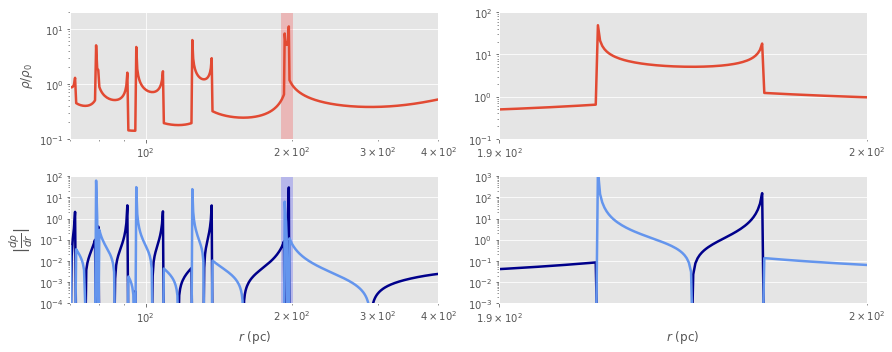

In [30]:
#zooming plot
fig = plt.figure(figsize=(12.5,5))
zoom=mpl.gridspec.GridSpec(2,2)

rhoR = plt.subplot(zoom[0,0])
#rhoR.vlines(turnRads,0.01,1000)
rhoR.loglog(aR,aDens)
rhoR.set_xlim([rMin,rMax])
rhoR.set_ylim([0.1,20])
rhoR.axvspan(190, 200, alpha=0.2, color='red')
rhoR.set_ylabel(r'$\rho/\rho_0$')

cRhoR = plt.subplot(zoom[0,1])
cRhoR.loglog(cR,cDens)
cRhoR.set_xlim([190,200])
cRhoR.set_ylim([0.1,1e2])
cRhoR.set_xticks([190])

gradR = plt.subplot(zoom[1,0])
pos=np.argwhere(aGrad>0)
neg=np.argwhere(aGrad<0)
pGrad=np.array(aGrad)
pGrad[neg]=1e-6
nGrad=np.abs(np.array(aGrad))
nGrad[pos]=1e-6
#gradR.vlines(turnRads,0.01,1000)
gradR.loglog(aR,pGrad,c='darkblue')
gradR.loglog(aR,nGrad,c='cornflowerblue')
gradR.set_xlim([rMin,rMax])
gradR.set_ylim([0.0001,100])
gradR.set_xlabel(r'$r$ (pc)')
gradR.axvspan(190, 200, alpha=0.2, color='blue')
gradR.set_ylabel(r'$\left\vert \frac{d\rho}{dr} \right\vert$', fontsize=15)

cGradR = plt.subplot(zoom[1,1])
pos=np.argwhere(cGrad>0)
neg=np.argwhere(cGrad<0)
pGrad=np.array(cGrad)
pGrad[neg]=1e-6
nGrad=np.abs(np.array(cGrad))
nGrad[pos]=1e-6
cGradR.loglog(cR,pGrad,c='darkblue')
cGradR.loglog(cR,nGrad,c='cornflowerblue')
cGradR.set_xlim([190,200])
cGradR.set_xticks([190])
cGradR.set_ylim([0.001,1000])
cGradR.set_xlabel(r'$r$ (pc)')

plt.tight_layout()
plt.savefig('plots/rho_grad_r.pdf')

#zRhoR = plt.subplot(zoom[2,0])
#zRhoR.loglog(zR,zDens)
#zRhoR.set_xlim([192.6,192.7])
#zRhoR.set_ylim([0.1,1e4])
#zRhoR.set_xticks([192.6,192.7])
#zRhoR.set_xlabel(r'$r$ (pc)')

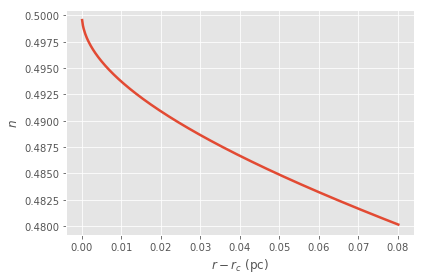

In [23]:
nR=plt.gca()
tRads=zR[zR>turnRads[0]]
tDens=zDens[zR>turnRads[0]]
tGrad=zGrad[zR>turnRads[0]]
tR=tRads-turnRads[0]
n=-tR*tGrad/tDens
nR.plot(tR,n)
nR.set_xlabel(r'$r-r_c$ (pc)')
nR.set_ylabel(r'$n$')

plt.tight_layout()
plt.savefig('plots/n_r.pdf')

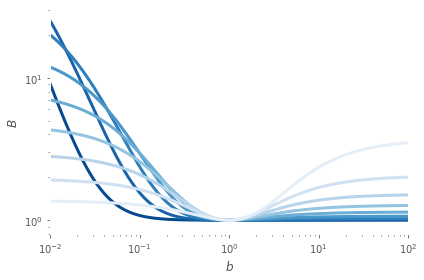

In [192]:
def plotBoost(plot,gamma,colour):
    bs=np.logspace(-2,2,1000)
    boost=(1+(np.power(bs,-2)-1)*gamma**3)/(1+(np.power(bs,-1)-1)*gamma**3)**2
    plot.loglog(bs,boost,c=colour,lw=3)
bBoost=plt.gca()
cmap = mpl.cm.get_cmap('Blues')
for i in range(1,10):
    plotBoost(bBoost,i/10,cmap(1-(i/10)))
bBoost.set_facecolor('white')
bBoost.set_xlabel(r'$b$')
bBoost.set_ylabel(r'$B$')
plt.xlim(0.01,100)
plt.ylim(0.8,30)
plt.tight_layout()
plt.savefig('plots/b_boost.pdf')

/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10


(100, 100)


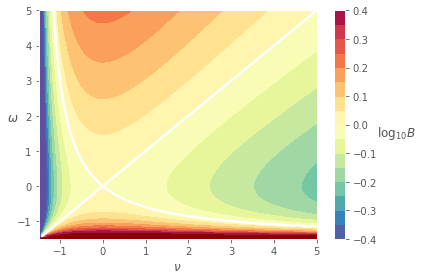

In [191]:
minVal=-1.5
maxVal=5
nVal=100
minBoost=10**-0.5
maxBoost=10**0.5
nu=np.linspace(minVal,maxVal,nVal)
omega=np.linspace(minVal,maxVal,nVal)
X, Y = np.meshgrid(nu, omega)
boost=((3+2*X)/(3+2*Y))*np.power(((3+Y)/(3+X)),2)
#X, Y = np.meshgrid(nu, omega)
print(boost.shape)
powBoost=plt.gca()
levels=np.linspace(1,1,1)
#fillLevels=10**np.linspace(np.log10(minBoost),np.log10(maxBoost),9)
fillLevels=np.linspace(-0.4,0.4,17)
powBoost.contour(X, Y, boost,levels,cmap='Greys')
cmap= mpl.cm.get_cmap('Spectral_r')
powBoost.fill_between([minVal,maxVal],[minVal,maxVal],maxVal,color=cmap(0))
powBoost.fill_between([minVal,maxVal],minVal,[minVal,maxVal],color='darkred')
#fill=powBoost.contourf(X,Y,boost,fillLevels,cmap='Spectral_r')
fill=powBoost.contourf(X,Y,np.log10(boost),fillLevels,cmap='Spectral_r')
cb=plt.colorbar(fill)
cb.set_label(r'$\log_{10}{B}$',labelpad=20,rotation=0)
powBoost.set_xlim(minVal,maxVal)
powBoost.set_ylim(minVal,maxVal)
powBoost.set_xlabel(r'$\nu$')
powBoost.set_ylabel(r'$\omega$',rotation=0)
powBoost.set_facecolor('white')
plt.tight_layout()
plt.savefig('plots/power_boost.pdf')

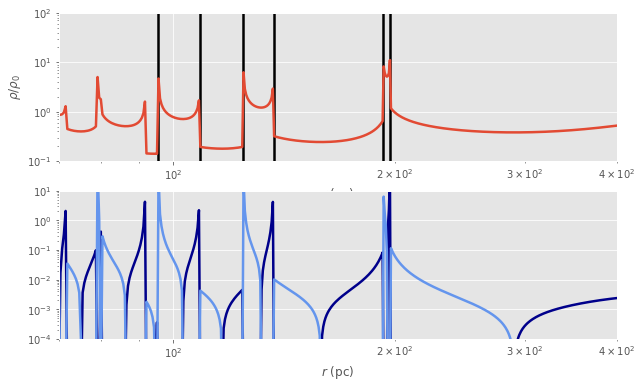

In [10]:
# rho vs r & grad rho vs r
fig = plt.figure(figsize=(10,6))
gradPlot=mpl.gridspec.GridSpec(2,1)

rhoR = plt.subplot(gradPlot[0,0])
rhoR.vlines(turnRads,0.01,1000)
rhoR.loglog(aR,aDens)
rhoR.set_xlim([rMin,rMax])
rhoR.set_ylim([0.1,100])
rhoR.set_xlabel(r'$r$ (pc)')
rhoR.set_ylabel(r'$\rho/\rho_0$')

gradR = plt.subplot(gradPlot[1,0])
pos=np.argwhere(aGrad>0)
neg=np.argwhere(aGrad<0)
pGrad=np.array(aGrad)
pGrad[neg]=1e-6
nGrad=np.abs(np.array(aGrad))
nGrad[pos]=1e-6
#gradR.vlines(turnRads,0.01,1000)
gradR.loglog(aR,pGrad,c='darkblue')
gradR.loglog(aR,nGrad,c='cornflowerblue')
gradR.set_xlim([rMin,rMax])
gradR.set_ylim([0.0001,10])
gradR.set_xlabel(r'$r$ (pc)')
#gradR.set_ylabel(r'$\rho/\rho_0$')

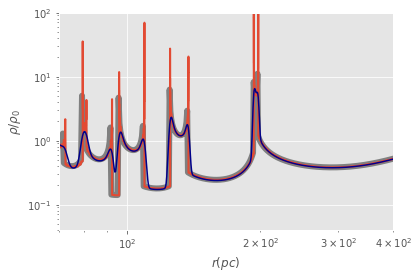

In [23]:
nBin=1000
smoothLength=1
data=np.genfromtxt('output/PointMass.4_4.txt')
rads=np.linspace(rMin,rMax,nBin)
smoothDens=cIo.findSmoothDens(rads,nBin,data,smoothLength)
boxRads,boxDens=cIo.findDens(data)
simR = plt.gca()
simR.loglog(aR,aDens,lw=6,color='gray')
simR.loglog(boxRads,boxDens,lw=2)
simR.loglog(rads,smoothDens,color='darkblue',lw=1.5)
#simR.loglog(np.arange(250,300),(250/np.arange(250,300))**(3/2),linestyle='-')
simR.set_xlabel(r'$r  (pc)$')
simR.set_ylabel(r'$\rho/\rho_0$')
simR.set_xlim([rMin,rMax])
simR.set_ylim([0.04,100])
plt.savefig('plots/sim_rho.pdf')

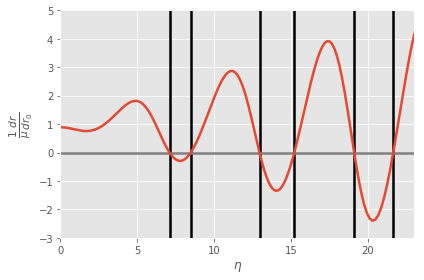

In [31]:
tempEtas=10**(np.linspace(np.log10(0.01),np.log10(100),num=1000))
omegas=cAnalytic.omega(tempEtas)
thetas=cAnalytic.theta(tempEtas)
oEta = plt.gca()
oEta.plot([0,100],[0,0],color='gray')
oEta.vlines(turns,-3,5)
oEta.plot(tempEtas,omegas)
oEta.set_xlim([0,23])
oEta.set_ylim([-3,5])
oEta.set_xlabel(r'$\eta$')
oEta.set_ylabel(r'$\frac{1}{\mu} \frac{dr}{dr_0}$', fontsize=15)
plt.tight_layout()
plt.savefig('plots/omega_eta.pdf')

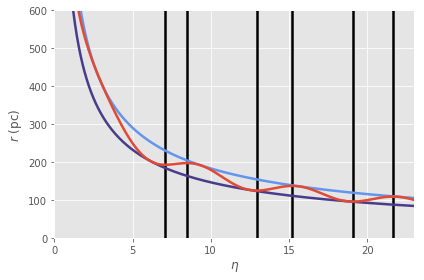

In [47]:
rMins=(G*m*(t**2)*((1-eps)**3)/(etas**2))**(1/3)
rMaxs=(G*m*(t**2)*((1+eps)**3)/(etas**2))**(1/3)
rEta=plt.gca()
rEta.plot(etas,rMins,color='darkslateblue')
rEta.plot(etas,rMaxs,color='cornflowerblue')
rEta.vlines(turns,0,600)
rEta.plot(etas,rs)
rEta.set_xlim([0,23])
rEta.set_ylim([0,600])
rEta.set_xlabel(r'$\eta$')
rEta.set_ylabel(r'$r$ (pc)')
plt.tight_layout()
plt.savefig('plots/r_eta.pdf')

(-1, 1)

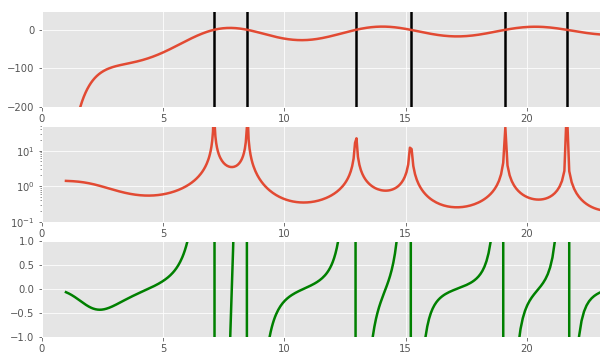

In [15]:
fig = plt.figure(figsize=(10,6))
testGrid=mpl.gridspec.GridSpec(3,1)

dr_dEtas=cAnalytic.dr_dEta(etas)
dr_dEta=plt.subplot(testGrid[0,0])
dr_dEta.plot(etas,dr_dEtas)
dr_dEta.set_xlim([0,23])
dr_dEta.set_ylim([-200,50])
dr_dEta.vlines(turns,-1000,1000)

om=cAnalytic.omega(etas)
th=cAnalytic.theta(etas)
al=cAnalytic.alpha(etas)
dOm=cAnalytic.dOmega(etas)
dTh=cAnalytic.dTheta(etas)
dFactor=-(1/(np.power(th,2)*np.abs(om)))*((2/th)*dTh + (1/om)*dOm)

que=np.power(cAnalytic.theta(etas),-2)/np.abs(cAnalytic.omega(etas))
queEta=plt.subplot(testGrid[1,0])
queEta.semilogy(etas,que)
queEta.set_xlim([0,23])
queEta.set_ylim([0.1,50])

#dOmega=cAnalytic.dOmega(etas)
#emderivative = (-(np.abs(om)*np.sin(etas))/(th**2 * om**2)) * ((2./th) + (1./om)*(1. - (3./(2.*np.sin(etas))) - (3./(2.*al*(1. - np.cos(etas))))))
#emderivative = ((-2.*np.sin(etas))/(th**3. * np.abs(om))) - ((np.abs(om)*np.sin(etas))/(th**2. * om**3.))*(1. - (3./(2.*np.sin(etas))) + (3./(2.*al*(1.-np.cos(etas)))))
#emderivative_minus = ((-2.*np.sin(etas))/(th**3. * np.abs(om))) - ((np.abs(om)*np.sin(etas))/(th**2. * om**3.))*(1. - (3./(2.*np.sin(etas))) - (3./(2.*al*(1.-np.cos(etas)))))


drdeta=cAnalytic.dr_dEta(etas)
dQue=cAnalytic.dRho_dr(etas)*drdeta
dQueEta=plt.subplot(testGrid[2,0])
dQueEta.plot(etas,dFactor,"g")

#dQueEta.plot(etas,dQue)
dQueEta.set_xlim([0,23])
dQueEta.set_ylim([-1,1])

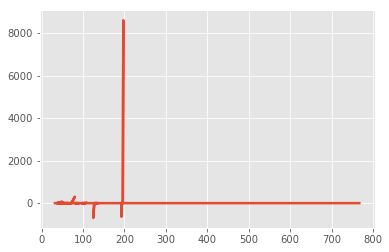

In [16]:
#old and wrong?
import causticTools.analytic as cAnalytic
%autoreload 2
gradEtas=10**(np.linspace(1e-6,np.log10(100),num=100))
gradRs=cAnalytic.findRad(gradEtas)
dRho_dr=np.zeros(100)
for i in range(100):
    dRho_dr[i]=cAnalytic.dRho_dr(gradEtas[i])
gradR=plt.gca()
gradR.plot(gradRs,dRho_dr)

(8.7043480830447113e-05, 50000000)

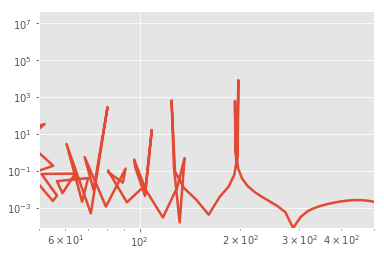

In [17]:
#old and wrong?
gradR=plt.gca()
gradR.loglog(gradRs,np.abs(dRho_dr))
gradR.set_xlim([50,500])
gradR.set_ylim([0,50000000])

# How steep are caustics?

In [18]:
nR=512
cMin=180
cMax=210
zMin=192.6
zMax=193
cR,cDens,cGrad=cAnalytic.densProfile(cMin,cMax,nR,M,m,t,returnGradient=1)
zR,zDens,zGrad=cAnalytic.densProfile(zMin,zMax,nR,M,m,t,returnGradient=1,evenSpaced=1)

/Users/Zephyr/Google Drive/astro/caustics/causticTools/analytic.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  return ((G*m*(t**2))*((1-eps*np.cos(eta))**3)/((eta-eps*np.sin(eta))**2))**(1/3)


KeyboardInterrupt: 

In [284]:
print(turnRads.size)

6


(0.01, 10.0)

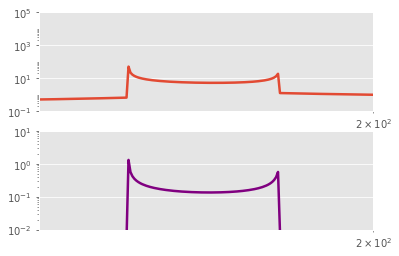

In [10]:
midZoom=mpl.gridspec.GridSpec(2,1)

cRhoR = plt.subplot(midZoom[0,0])
cRhoR.loglog(cR,cDens)
#rhoR.loglog(aR,threeOver*aDens[-1]/threeOver[-1],linestyle='-')
#rhoR.loglog(aR,three*aDens[-1]/three[-1],linestyle='-')
cRhoR.set_xlim([190,200])
cRhoR.set_ylim([0.1,1e5])

cGradR = plt.subplot(midZoom[1,0])
#gradR.loglog(aR[aGra d>0],aGrad[aGrad>0],c='blue')
#gradR.loglog(aR[aGrad<0],-aGrad[aGrad<0],c='purple')
cGradR.loglog(cR,np.abs(cGrad),c='purple')
cGradR.vlines(turns,1,1e9)
cGradR.set_xlim([190,200])
cGradR.set_ylim([1e-2,1e1])

(0.1, 100000.0)

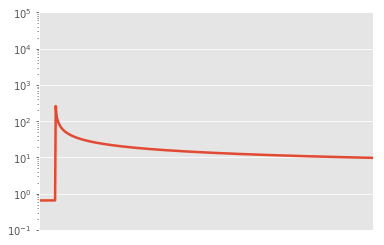

In [26]:
zRhoR = plt.gca()
zRhoR.loglog(zR,zDens)
#rhoR.loglog(aR,threeOver*aDens[-1]/threeOver[-1],linestyle='-')
#rhoR.loglog(aR,three*aDens[-1]/three[-1],linestyle='-')
zRhoR.set_xlim([192.6,193])
zRhoR.set_ylim([0.1,1e5])

/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()


(0.1, 2)

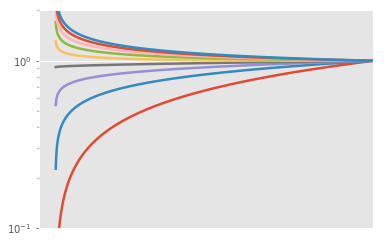

In [34]:
powerR = plt.gca()
for i in range(1,10):
    power=np.power(1/(zR-turnRads[0]),1/np.sqrt(i))
    power=power*(zDens[-1]/power[-1])
    powerR.loglog(zR,zDens/power)
#rhoR.loglog(aR,threeOver*aDens[-1]/threeOver[-1],linestyle='-')
#rhoR.loglog(aR,three*aDens[-1]/three[-1],linestyle='-')
powerR.set_xlim([192.6,193])
powerR.set_ylim([0.1,2])

(1000000.0, 1000000000.0)

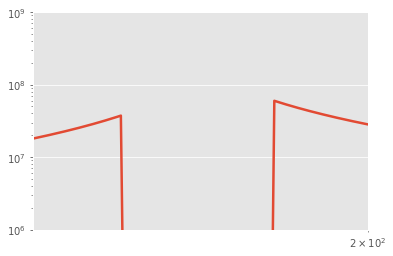

In [32]:
gradRad=plt.gca()
gradRad.loglog(cR,np.abs(cGrad))
gradRad.vlines(turns,1,1e9)
gradRad.set_xlim([190,200])
gradRad.set_ylim([1e6,1e9])